In [1]:
import equitorch
from equitorch.nn.radials import BesselBasis
from equitorch.nn.cutoffs import PolynomialCutoff, CosineCutoff, MollifierCutoff
import torch
import matplotlib.pyplot as plt

/home/Xenadon/miniconda3/lib/python3.12/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /home/Xenadon/miniconda3/lib/python3.12/site-packages/libpyg.so: undefined symbol: _ZN5torch8autograd12VariableInfoC1ERKN2at6TensorE
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/Xenadon/miniconda3/lib/python3.12/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /home/Xenadon/miniconda3/lib/python3.12/site-packages/libpyg.so: undefined symbol: _ZN5torch8autograd12VariableInfoC1ERKN2at6TensorE
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [2]:
b = BesselBasis(1, 8)
x = torch.rand(1000)
b(x).shape

torch.Size([1000, 8])

In [3]:
print(b(x).flatten(0,-2).detach().shape)
print(x.detach().unsqueeze(-1).repeat_interleave(b.num_basis, -1).shape)

torch.Size([1000, 8])
torch.Size([1000, 8])


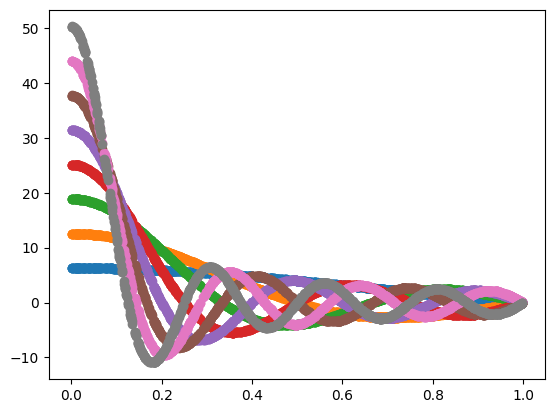

In [4]:
for i in range(b.num_basis):
    plt.scatter(x.detach(),b(x)[...,i].detach())

torch.Size([1000])


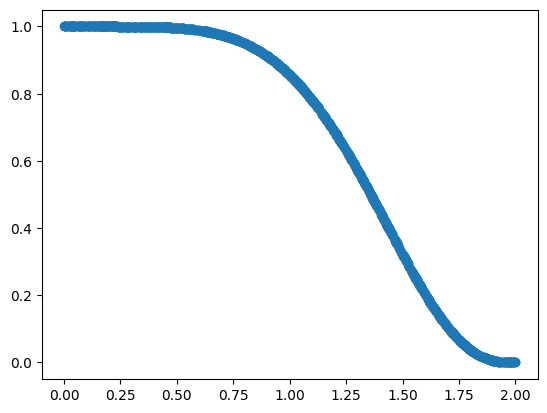

In [8]:
c = PolynomialCutoff(2)
x = torch.rand(1000) * 2
print(c(x).shape)
plt.scatter(x.detach(),c(x).detach())

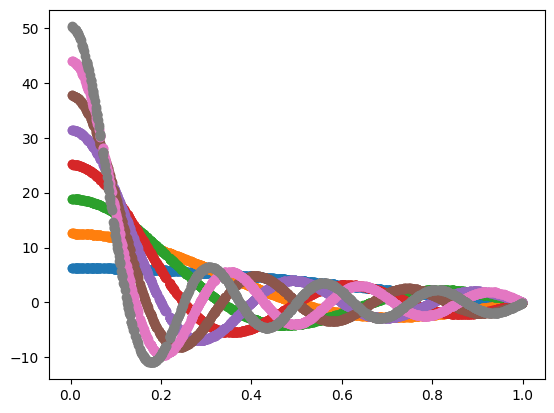

In [6]:
for i in range(b.num_basis):
    plt.scatter(x.detach(),b(x)[...,i].detach()*c(x))

torch.Size([1000])


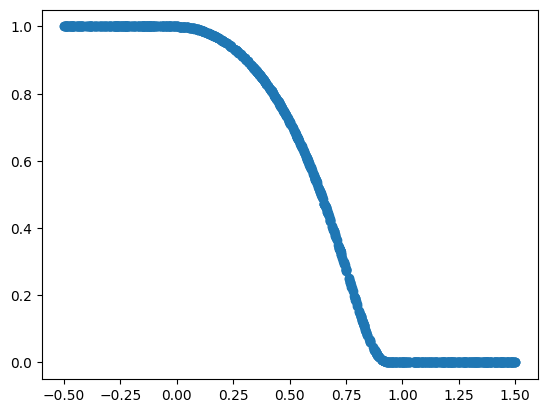

In [13]:
c = MollifierCutoff(1)
x = torch.rand(1000) * 2 - 0.5
print(c(x).shape)
plt.scatter(x.detach(),c(x).detach())

torch.Size([1000])


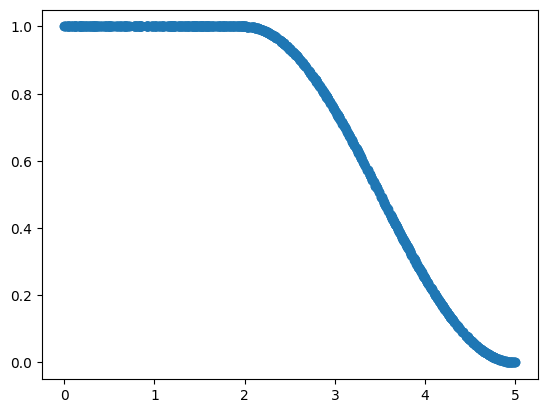

In [15]:
c = CosineCutoff(5, 2)
x = torch.rand(1000) * 5
print(c(x).shape)
plt.scatter(x.detach(),c(x).detach())